In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
library(DAseq)
load("6_18.RData")

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




# Look at G0 and G1 

conclusion, these gene list from "A novel cell-cycle-indicator,
mVenus-p27K2, identifies quiescent cells
and visualizes G0–G1 transition" do not seem to work

In [2]:
G0 = read.table("G0.list",header=F)
G0

V1
<chr>
Hp
Hist2h3c2-ps
Braf
Cyp2f2
Ghr
Lcn2
Tcp11l2
Hist1h2bc
Ogn


Warning message in DoHeatmap(merged_obj, features = G0$V1, size = 5, slot = "data"):
"The following features were omitted as they were not found in the data slot for the RNA assay: LOC100503330, B330016D10Rik, 3110007F17Rik, Ang3, LOC552908, Scn2a1, 4931408A02Rik, Jhdm1d, LOC100502819, C230098O21Rik, BC031353, Pcdha10, Hist2h3c2-ps"
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



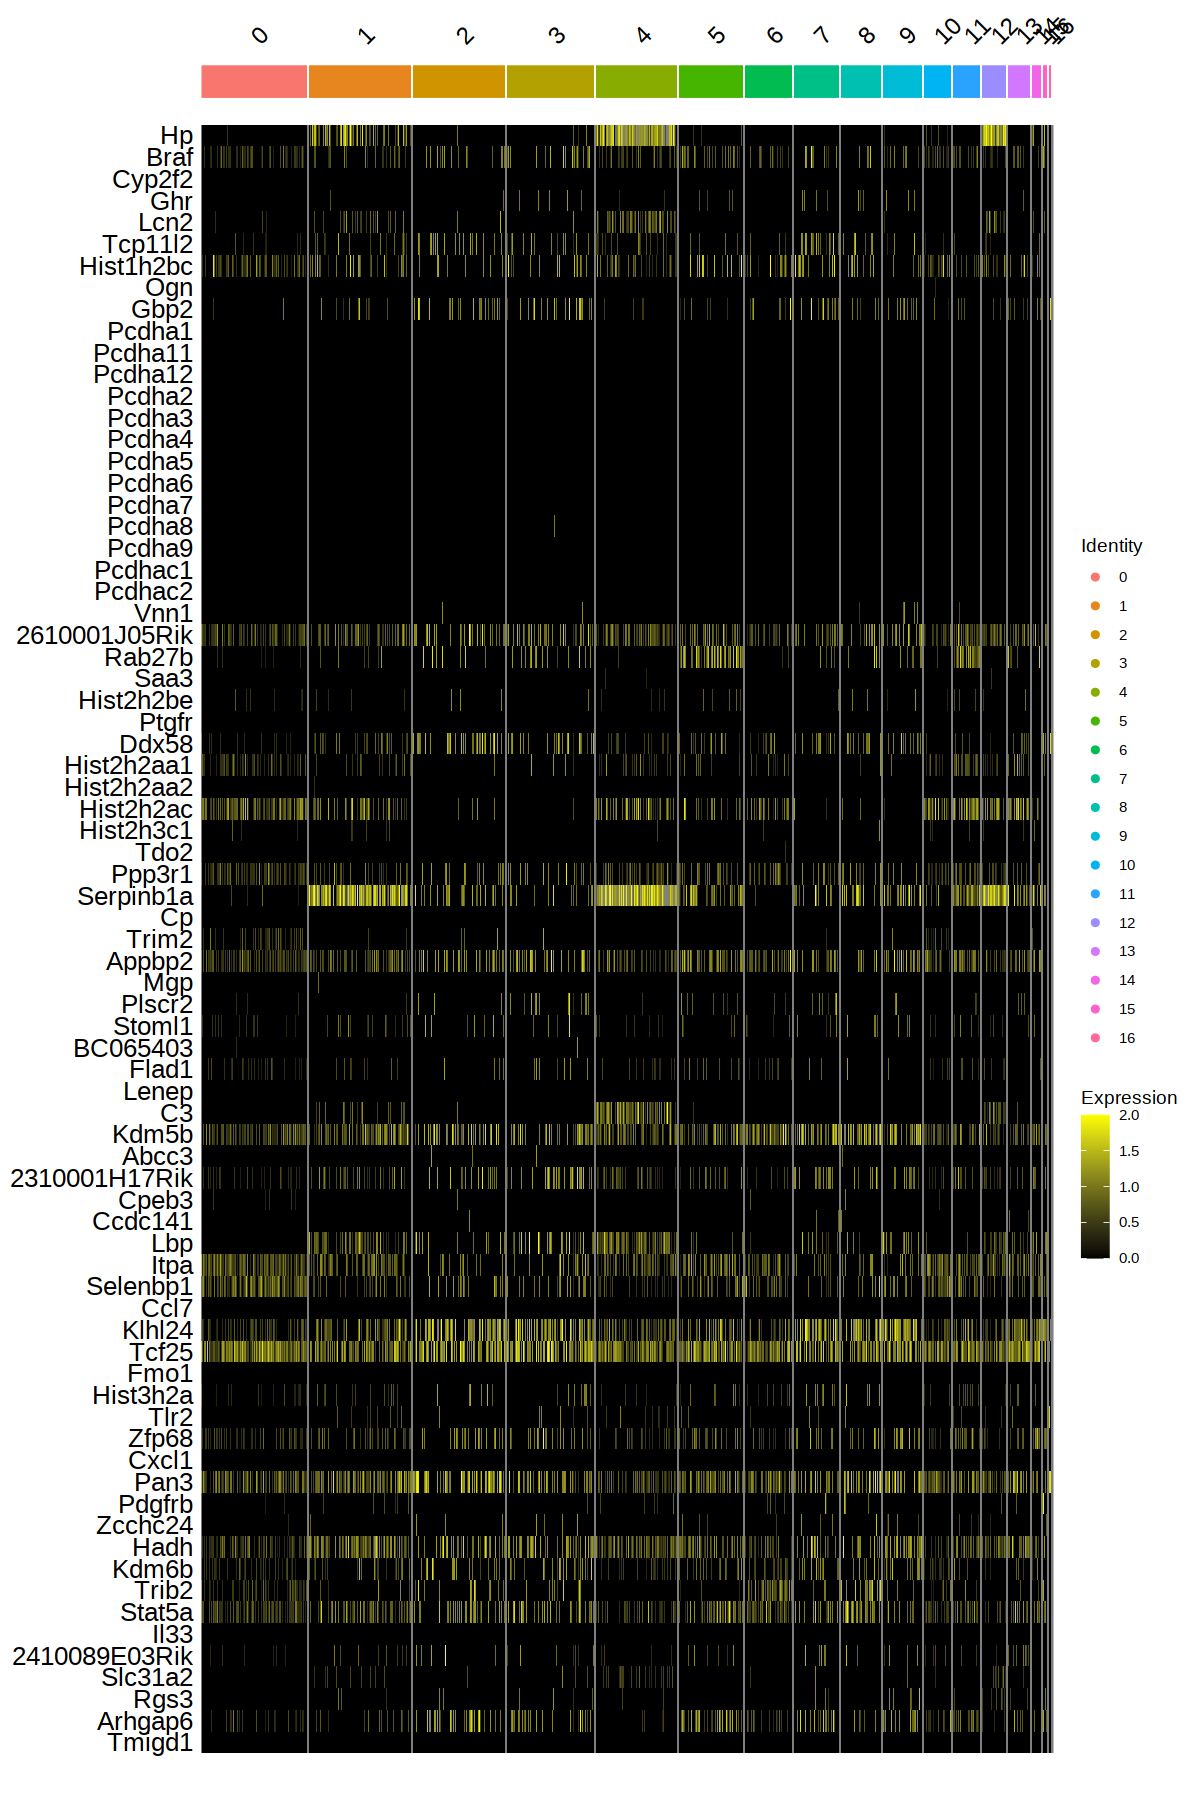

In [6]:
options(repr.plot.width = 10, repr.plot.height = 15)
DoHeatmap(merged_obj, features = G0$V1, size  = 5,slot="data")+theme(axis.text.y = element_text(face="plain", color="black", 
                           size=15, angle=0))+scale_fill_gradient2(low = "magenta", high = "yellow", mid = "black", 
                                                                   midpoint = 0, limits = c(0, 2))

Warning message in DoHeatmap(merged_obj, features = G0$V1, size = 5):
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Tmigd1, Arhgap6, Rgs3, Slc31a2, 2410089E03Rik, Il33, Stat5a, LOC100503330, B330016D10Rik, Kdm6b, Hadh, Zcchc24, Pdgfrb, Pan3, Cxcl1, Zfp68, Tlr2, Hist3h2a, Fmo1, Tcf25, Klhl24, 3110007F17Rik, Ang3, LOC552908, Ccl7, Scn2a1, 4931408A02Rik, Itpa, Ccdc141, Cpeb3, Jhdm1d, 2310001H17Rik, Abcc3, Kdm5b, Lenep, Flad1, LOC100502819, BC065403, Stoml1, C230098O21Rik, BC031353, Appbp2, Cp, Ppp3r1, Tdo2, Hist2h3c1, Hist2h2aa2, Ddx58, Ptgfr, Hist2h2be, 2610001J05Rik, Vnn1, Pcdhac2, Pcdhac1, Pcdha9, Pcdha8, Pcdha7, Pcdha6, Pcdha5, Pcdha4, Pcdha3, Pcdha2, Pcdha12, Pcdha11, Pcdha10, Pcdha1, Ogn, Tcp11l2, Ghr, Cyp2f2, Braf, Hist2h3c2-ps"


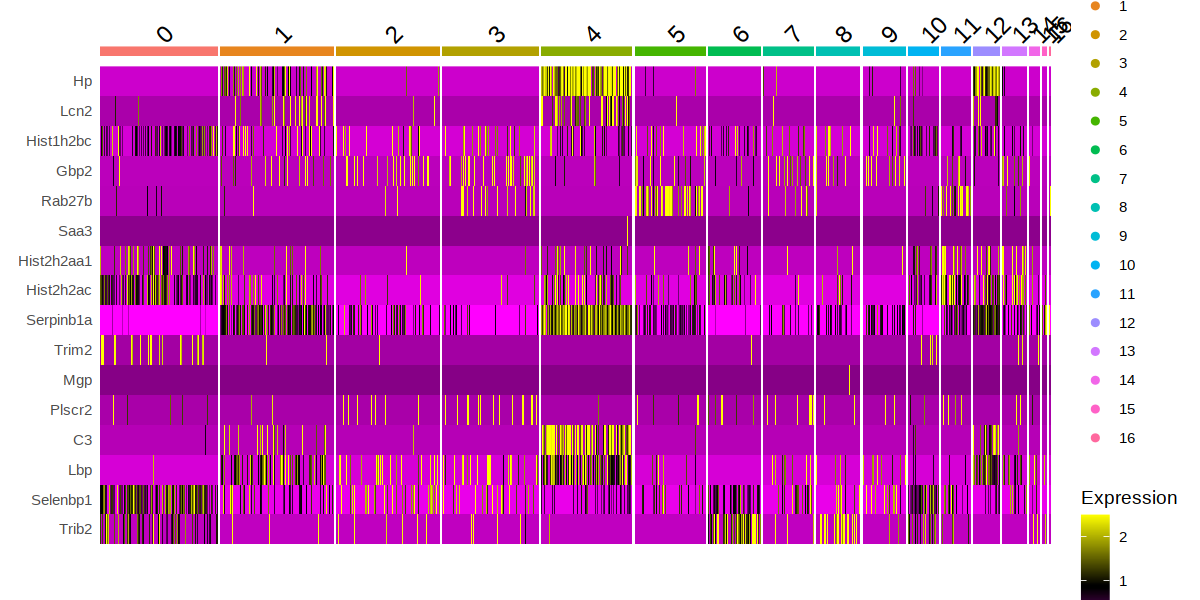

In [8]:
options(repr.plot.width = 10, repr.plot.height = 5)
DoHeatmap(merged_obj, features = G0$V1, size  = 5)

In [9]:
G1 = read.table("G1.list",header=F)
G1

V1
<chr>
Gm11276
Hist1h2ao
Aurkb
Hmmr
Shcbp1
Mki67
Esco2
Bard1
Ska1


Warning message in DoHeatmap(merged_obj, features = G1$V1, size = 5):
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Tyms-ps, Zranb3, BC030867, Gins1, 2610039C10Rik, Apitd1, Pole, Prim1, Chaf1b, Ccdc99, Kntc1, Mcm8, BC055324, 5730590G19Rik, Ube2t, 1700024J04Rik, E130306D19Rik, Recql4, Fam131b, Tubgcp5, Nsl1, Mlf1, Vamp3, LOC100503583, Rfc5, Kif24, Slc25a10, 4930427A07Rik, 4632434I11Rik, D17H6S56E-5, Chtf18, Cenpn, Ercc6l, Mlf1ip, 4930547N16Rik, Troap, Gtse1, Fanci, Cdc45, Exo1, Iqgap3, Atf7ip2, Fancd2, Kif18b, Haus8, Tcf19, Sgol1, Ppil5, Zwilch, 2610002D18Rik, Tube1, Sass6, Fancb, E2f7, Oip5, D2Ertd750e, Gsg2, Rad54b, Fam54a, Sgol2, Mastl, C79407, Rtkn2, Haus5, Traip, Ttk, 4930534B04Rik, Mad2l1, 2700099C18Rik, 2810417H13Rik, Pebp1, Foxm1, 4933413G19Rik, Ndc80, Melk, Eme1, Depdc1b, Fam64a, Casc5, Cdca5, Rad54l, Cenpq, Cenpi, Hist1h2ao, Gm11276"


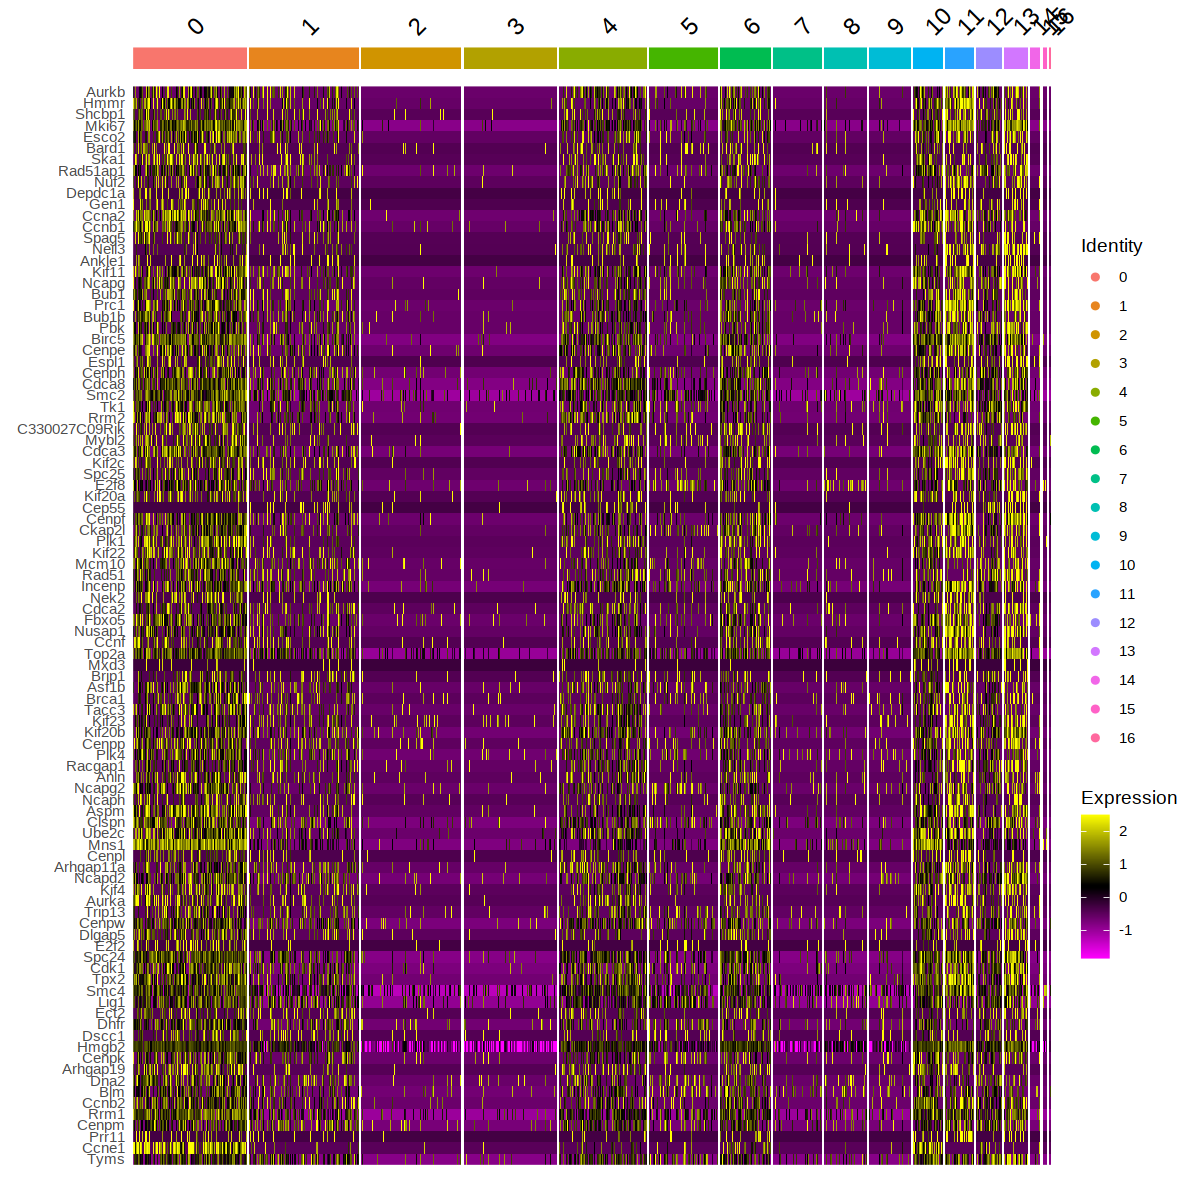

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)
DoHeatmap(merged_obj, features = G1$V1, size  = 5)

# Differential gene expression analysis between WT and KO

Parameters used in early analysis might need some tuning

In [37]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mWT", ident.2 = "mNFIXko",
            group.by="orig.ident",logfc.threshold = 0.1,min.pct=0.1,test.used="LR")
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,0.0003988826,-0.3598497,0.237,0.368,1


In [47]:
library(Signac)

Loading required package: RcppParallel

Loading required package: readr

Loading required package: httpuv

Loading required package: jsonlite


Attaching package: 'Signac'


The following object is masked from 'package:Seurat':

    Read10X




In [52]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
Idents(tmp)="orig.ident"
a=VeniceMarker(tmp@assays$RNA@counts, cluster=Idents(tmp) == "mNFIXko")
a[a$Gene.Name=="Cd74",]

In [141]:
degs

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gm47283,1.036221e-89,-0.5924145,0.394,0.772,3.217778e-85
Hbb-bt,1.778083e-34,1.8829831,0.316,0.089,5.521480e-30
Hbb-bs,6.928752e-13,1.5699647,0.353,0.483,2.151585e-08
H2-Q7,1.371130e-11,0.2723928,0.746,0.597,4.257771e-07
AY036118,2.368499e-09,0.3571423,0.757,0.629,7.354899e-05


In [152]:
for (c in levels(merged_obj)){
    tmp = subset(x = merged_obj, subset = seurat_clusters == c)
    degs = FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.25,min.pct=0.1,min.diff.pct=0.1,test.used="wilcox",pseudocount.use=1)
    degs['fdr'] = p.adjust(degs$p_val, "BH")
    degs=degs[degs$fdr<=0.01,]
    write.table(degs,paste("Cluster",c,".DEG.orig.ident.tsv",sep=""),sep="\t")
    if (dim(degs)[1]==0){next}
    # UMAP plot
    wt1 = WhichCells(merged_obj, expression = orig.ident == "mWT" & seurat_clusters==c)
    ko1 = WhichCells(merged_obj, expression = orig.ident == "mNFIXko" & seurat_clusters==c)

    DimPlot(merged_obj,reduction = 'wnn.umap', label=T, cells.highlight= list("mNFIXko"=ko1, "mWT"=wt1), 
        cols.highlight = list("#E64B35","#4DBBD5"), cols= "grey100",repel = T, label.size = 5)+
        scale_colour_manual(values = c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))
    ggsave(paste("Cluster",c,".UMAP.orig.ident.png", sep=""))
    # Vlnplot
    VlnPlot(tmp, features = rownames(degs),group.by="orig.ident",ncol=4,cols=c("mNFIXko"="#E64B35","mWT"="#4DBBD5"))+ NoLegend()
    ggsave(paste("Cluster",c,".Vln.orig.ident.png", sep=""),height=as.integer(length(degs)/4+1)*6,width=7)
}

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Saving 6.67 x 6.67 in image


[1] 2

In [144]:
FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.25,min.pct=0.1,min.diff.pct=0.1,test.used="wilcox",pseudocount.use=1)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gm47283,1.036221e-89,-0.5924145,0.394,0.772,3.217778e-85
Hbb-bt,1.778083e-34,1.8829831,0.316,0.089,5.521480e-30
Hbb-bs,6.928752e-13,1.5699647,0.353,0.483,2.151585e-08
H2-Q7,1.371130e-11,0.2723928,0.746,0.597,4.257771e-07
AY036118,2.368499e-09,0.3571423,0.757,0.629,7.354899e-05


In [139]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.25,min.pct=0.1,min.diff.pct=0.1,test.used="wilcox",pseudocount.use=1,method ="BH")

a['fdr'] = p.adjust(a$p_val, "BH")
a["Cd74",]
a["Mpl",]
a=a[a$fdr<=0.01,]
dim(a)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,0.0003988826,0.3598497,0.368,0.237,1,0.0004612081


,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mpl,2.303705e-06,0.3039507,0.723,0.51,0.07153694,7.748825e-06


[1] 37  6

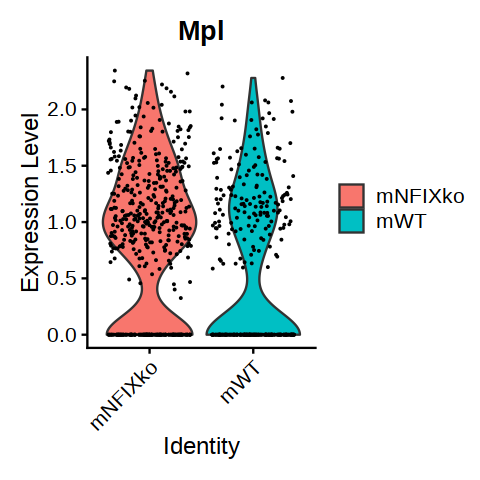

In [98]:
options(repr.plot.width = 4, repr.plot.height =4)
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")

VlnPlot(tmp, features = c("Mpl"),group.by="orig.ident")

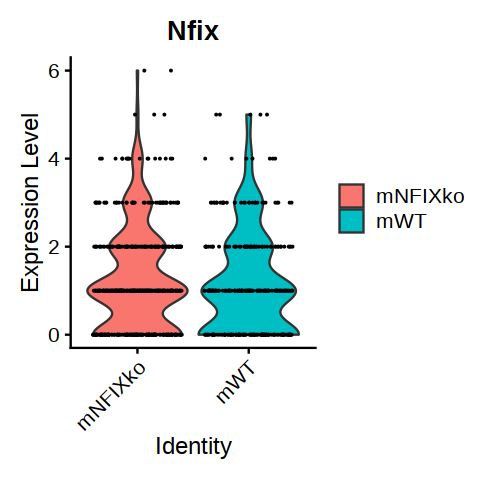

In [101]:
options(repr.plot.width = 4, repr.plot.height =4)
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")

VlnPlot(tmp, features = c("Nfix"),group.by="orig.ident",split.by="",slot="counts")

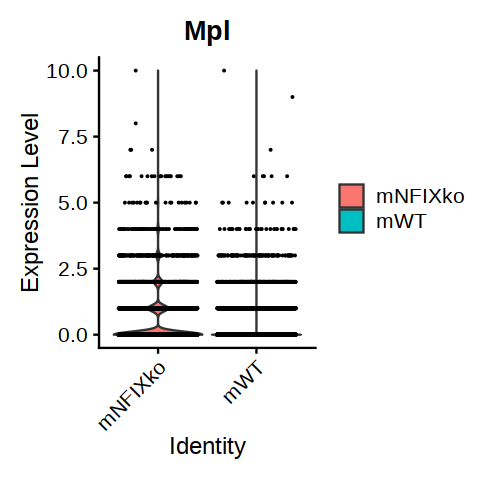

In [100]:
VlnPlot(merged_obj, features = c("Mpl"),group.by="orig.ident",slot="counts")

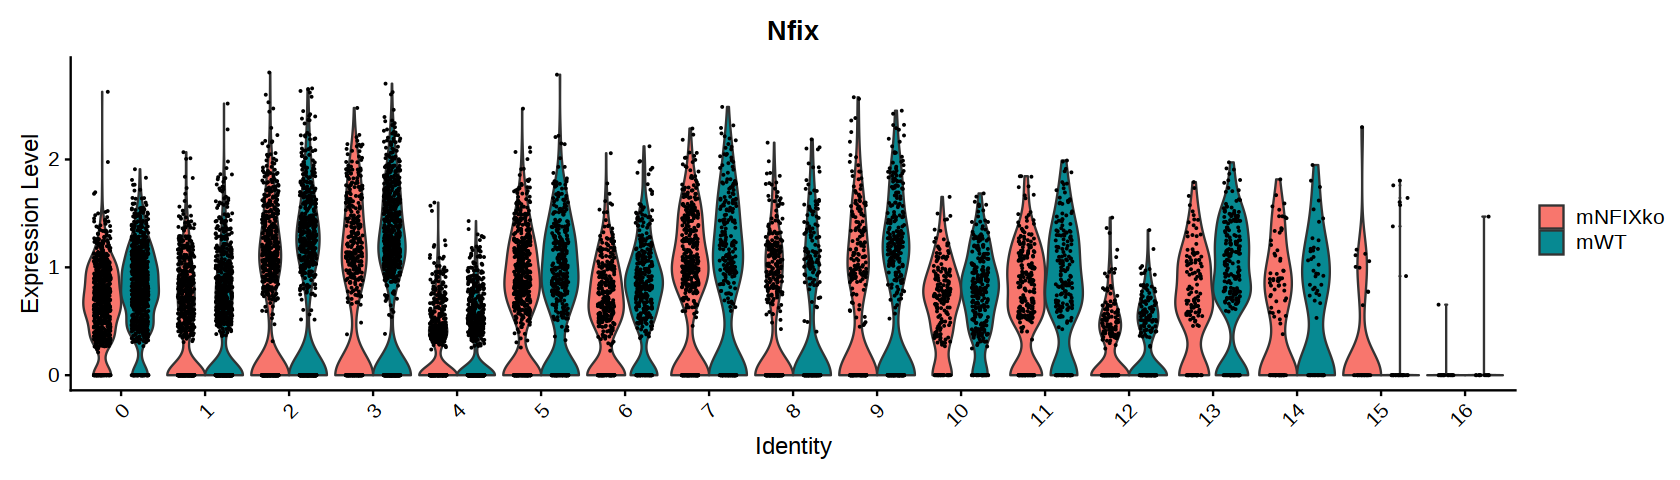

In [106]:
options(repr.plot.width = 14, repr.plot.height =4)

VlnPlot(merged_obj, features = c("Nfix"),group.by="seurat_clusters",split.by="orig.ident",slot="data")

In [ ]:
options(repr.plot.width = 14, repr.plot.height =4)

VlnPlot(merged_obj, features = c("Nfix"),group.by="seurat_clusters",split.by="orig.ident")

In [79]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="bimod",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [78]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="roc",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [77]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="t",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [76]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="negbinom",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [75]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="LR",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [74]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="MAST",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [73]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="DESeq2",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [ ]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="wilcox",pseudocount.use=0)
a["Cd74",]

In [64]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="poisson",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,0.0003988826,0.7067258,0.368,0.237,1


In [63]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="counts",ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.3,min.pct=0.1,test.used="poisson",pseudocount.use=0)
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,6.298421e-05,0.9233543,0.368,0.237,1


In [41]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,ident.1 = "mNFIXko", ident.2 = "mWT",
            group.by="orig.ident",logfc.threshold = 0.1,min.pct=0.1,test.used="MAST")
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,0.0003988826,0.3598497,0.368,0.237,1


In [45]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
Idents(tmp)="orig.ident"
a=FindMarkers(tmp, verbose=T,ident.1 = "mNFIXko", ident.2 = "mWT",
            logfc.threshold = 0.1,min.pct=0.1,test.used="DESeq2")
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,0.0003988826,0.3598497,0.368,0.237,1


In [39]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
a=FindMarkers(tmp, verbose=T,slot="data",ident.1 = "mWT", ident.2 = "mNFIXko",
            group.by="orig.ident",logfc.threshold = 0.1,min.pct=0.1,test.used="DESeq2")
a["Cd74",]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cd74,0.0003988826,-0.3598497,0.237,0.368,1


In [17]:
tmp

An object of class Seurat 
31061 features across 778 samples within 2 assays 
Active assay: RNA (31053 features, 2000 variable features)
 1 other assay present: ADT
 5 dimensional reductions calculated: pca, apca, wnn.umap, rna.umap, adt.umap

In [ ]:
tmp = subset(x = merged_obj, subset = seurat_clusters == "7")
FindMarkers(tmp, ident.1 = "mWT", ident.2 = "mNFIXko")

In [19]:
merged_obj@assays


$RNA
Assay data with 31053 features for 13949 cells
Top 10 variable features:
 S100a8, S100a9, Pf4, Camp, Ngp, Chil3, Hbb-bs, Lcn2, Ccl5, Cma1 

$ADT
Assay data with 8 features for 13949 cells
Top 8 variable features:
 Sca1-TotalA, CD150-TotalA, CD48-TotalA, CD16-32-TotalA, CD105-TotalA,
CD41-TotalA, CD71-TotalA, CD34-TotalA 


In [81]:
?VeniceMarker

VeniceMarker {Signac},R Documentation
S4_mtx,A sparse matrix
cluster,A numeric vector
